# MODULE 4

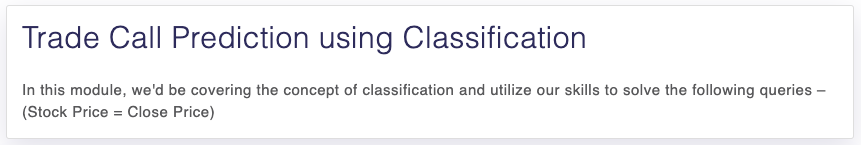

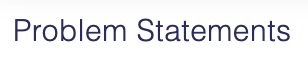

In [579]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 4.1

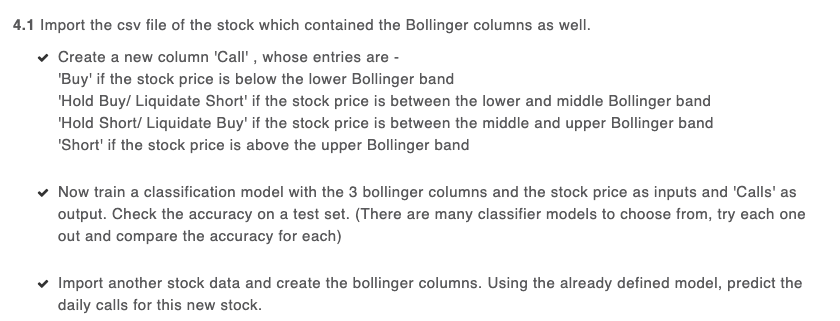

In [580]:
#importing the file
ds1 = pd.read_csv('AppleUpdated.csv')

In [581]:
ds1.set_index('Index',inplace=True)

In [582]:
ds1.head()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,VWAP,Day_Perc_Change,Trend,Daily_return,Upper Band,Lower Band,Mid Band
Index,,,,,,,,,,,,,,,
2019-10-24,2019-10-24,243.58,244.66,244.75,241.81,17.92,10,2019,243.58,0.000000,Slight or No Change,-0.441429,NaN,NaN,NaN
2019-10-23,2019-10-23,243.18,242.10,243.24,241.22,19.93,10,2019,243.18,-0.001642,Slight or No Change,0.446097,NaN,NaN,NaN
2019-10-22,2019-10-22,239.96,241.16,242.20,239.62,22.68,10,2019,239.96,-0.013241,Slight or No Change,-0.497595,NaN,NaN,NaN
2019-10-21,2019-10-21,240.51,237.52,240.99,237.32,22.37,10,2019,240.51,0.002292,Slight or No Change,1.258841,NaN,NaN,NaN
2019-10-18,2019-10-18,236.41,234.59,237.58,234.29,24.38,10,2019,236.41,-0.017047,Slight or No Change,0.775822,NaN,NaN,NaN


##### PART I

In [583]:
# Making a "Call" attribute
def call(ds1):
    if ds1['Close Price'] < ds1['Lower Band']:
        return "Buy"
    if ds1['Close Price'] > ds1['Lower Band'] and ds1['Close Price'] < ds1['Mid Band']:
        return "Hold Buy/ Liquidate Short"
    if ds1['Close Price'] > ds1['Mid Band'] and ds1['Close Price'] < ds1['Upper Band']:
        return "Hold Short/ Liquidate Buy"
    if ds1['Close Price'] > ds1['Upper Band']:
        return "Short"
ds1 = ds1.assign(Call = ds1.apply(call, axis=1))
ds1 = ds1.dropna()
ds1.head()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,VWAP,Day_Perc_Change,Trend,Daily_return,Upper Band,Lower Band,Mid Band,Call
Index,,,,,,,,,,,,,,,,
2019-10-07,2019-10-07,227.06,226.27,229.93,225.84,30.89,10,2019,227.06,0.011854,Slight or No Change,0.349140,246.887086,223.008629,234.947857,Hold Buy/ Liquidate Short
2019-10-04,2019-10-04,227.01,225.64,227.49,223.89,34.76,10,2019,227.01,-0.000220,Slight or No Change,0.607162,245.295591,222.232981,233.764286,Hold Buy/ Liquidate Short
2019-10-03,2019-10-03,220.82,218.43,220.96,215.13,30.35,10,2019,220.82,-0.027268,Slight or No Change,1.094172,244.260911,220.073375,232.167143,Hold Buy/ Liquidate Short
2019-10-02,2019-10-02,218.96,223.06,223.58,217.93,35.77,10,2019,218.96,-0.008423,Slight or No Change,-1.838070,243.764911,217.569375,230.667143,Hold Buy/ Liquidate Short
2019-10-01,2019-10-01,224.59,225.07,228.22,224.20,36.19,10,2019,224.59,0.025712,Slight or No Change,-0.213267,241.676402,217.383598,229.530000,Hold Buy/ Liquidate Short


##### PART II

In [584]:
# Input and Output Features
X = ds1.iloc[:, 12:15].values  
y = ds1.iloc[:, -1].values

In [585]:
# Splitting the DataSet
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [586]:
# fitting standard scaler in our dataset it makes mean=0 and standard deviation=1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

In [587]:
from sklearn.linear_model import LogisticRegression  
# Logistic Regression Model
LR_model = LogisticRegression().fit(X_train, y_train)
LR_model.predict(X_train) 
print("Logistic Regression")
print("Accuracy Score",round(LR_model.score(X_train,y_train), 4))

Logistic Regression
Accuracy Score 0.6006


In [588]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree Model
DT_model =  DecisionTreeClassifier()  
DT_model.fit(X_train, y_train)  
DT_model.predict(X_train) 
print("Decision Tree")
print("Accuracy Score",round(DT_model.score(X_train, y_train), 4))

Decision Tree
Accuracy Score 1.0


In [589]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest Model
RF_model = RandomForestClassifier(n_estimators=200, max_depth=2, random_state=0)  
RF_model.fit(X_train, y_train)  
RF_model.predict(X_train) 
print("Random Forests")
print("Accuracy Score",round(RF_model.score(X_train, y_train), 4))

Random Forests
Accuracy Score 0.5948


We can conclude that DECISION TREE MODEL performs well from any other models tested having the higher accuracy score.

##### PART III

In [590]:
#new dataset
ds2 = pd.read_csv('PVR.csv')

In [591]:
#Rolling mean and Standard deviation
sma = ds2['Close Price'].rolling(14).mean()
rstd = ds2['Close Price'].rolling(14).std()

In [592]:
upper_band = sma + 2 * rstd
lower_band = sma - 2 * rstd

#new dataframe
bands=pd.DataFrame()
#upper band values
bands['Upper Band']=upper_band
#lower band values
bands['Lower Band']=lower_band

In [593]:
#Adding the band values in the dataset
ds2['Upper Band']= bands['Upper Band']
ds2['Lower Band']= bands['Lower Band']
ds2['Mid Band']=(bands['Upper Band']+bands['Lower Band'])/2

In [594]:
ds2.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Upper Band,Lower Band,Mid Band
0,PVR,EQ,15-May-2017,1526.20,1532.35,1538.15,1515.45,1520.00,1524.95,1526.51,103693,1.582883e+08,7359,54518,52.58,NaN,NaN,NaN
1,PVR,EQ,16-May-2017,1524.95,1526.70,1545.00,1526.65,1533.25,1539.00,1538.04,86547,1.331129e+08,6332,39020,45.09,NaN,NaN,NaN
2,PVR,EQ,17-May-2017,1539.00,1539.70,1552.85,1526.05,1527.00,1530.30,1538.01,73902,1.136622e+08,4665,21303,28.83,NaN,NaN,NaN
3,PVR,EQ,18-May-2017,1530.30,1525.00,1539.35,1502.20,1514.90,1515.05,1519.68,82125,1.248035e+08,2903,38796,47.24,NaN,NaN,NaN
4,PVR,EQ,19-May-2017,1515.05,1515.00,1534.50,1502.20,1517.65,1513.55,1513.25,114890,1.738567e+08,9495,54764,47.67,NaN,NaN,NaN


In [595]:
#dropping nan values
ds2 = ds2.dropna()
# input datavalues
X = ds2.iloc[:, 15:18].values  
#Predicting now
ds2['Call']=DT.predict(X) 

In [596]:
# Dataset with the predicted values
ds2.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Upper Band,Lower Band,Mid Band,Call
13,PVR,EQ,01-Jun-2017,1454.95,1452.0,1469.70,1452.00,1455.0,1455.70,1459.95,59522,8.689907e+07,3090,23335,39.20,1551.543241,1421.935331,1486.739286,Hold Buy/ Liquidate Short
14,PVR,EQ,02-Jun-2017,1455.70,1457.3,1466.90,1452.35,1460.0,1457.80,1462.45,55880,8.172155e+07,2865,29238,52.32,1544.463966,1419.421749,1481.942857,Hold Buy/ Liquidate Short
15,PVR,EQ,05-Jun-2017,1457.80,1458.9,1464.65,1440.00,1444.0,1442.25,1452.10,102733,1.491781e+08,4617,51065,49.71,1531.478940,1418.585345,1475.032143,Hold Buy/ Liquidate Short
16,PVR,EQ,06-Jun-2017,1442.25,1445.0,1447.45,1378.85,1390.0,1392.85,1411.78,210916,2.977667e+08,16465,89785,42.57,1527.738588,1402.689984,1465.214286,Hold Buy/ Liquidate Short
17,PVR,EQ,07-Jun-2017,1392.85,1391.1,1409.00,1387.00,1400.0,1400.70,1400.17,165824,2.321824e+08,7911,70517,42.53,1521.376556,1392.716301,1457.046429,Hold Buy/ Liquidate Short


## 4.2

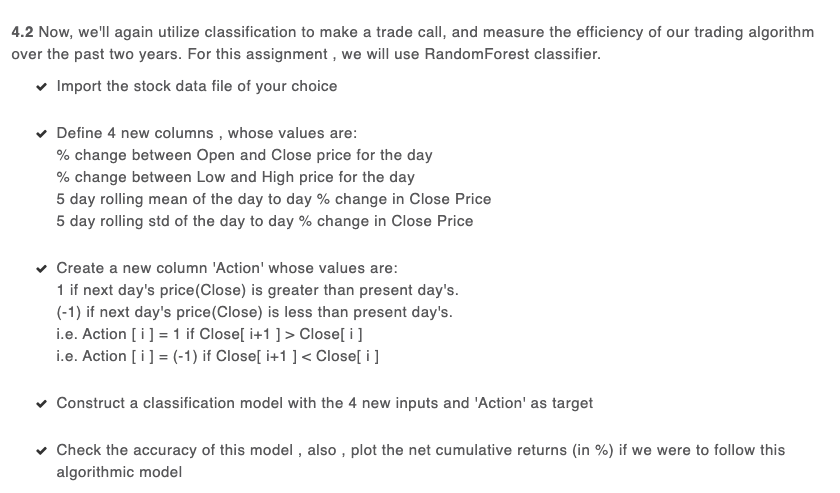

##### PART I

In [597]:
#importing the file
ds = pd.read_csv('AAPL (1).csv')

In [598]:
ds.head()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity
0,"Oct 24, 2019",243.58,244.66,244.75,241.81,17.92M
1,"Oct 23, 2019",243.18,242.10,243.24,241.22,19.93M
2,"Oct 22, 2019",239.96,241.16,242.20,239.62,22.68M
3,"Oct 21, 2019",240.51,237.52,240.99,237.32,22.37M
4,"Oct 18, 2019",236.41,234.59,237.58,234.29,24.38M


##### PART II

In [599]:
# Percentage change
ds['CP-OP%']=(ds['Close Price']-ds['Open Price']).pct_change()
ds['HP-LP%']=(ds['High Price']-ds['Low Price']).pct_change()
# Rolling mean
ds['RM_CP']=ds['Close Price'].rolling(5).mean()
# Rolling Standard Deviation
ds['RSD_CP']=ds['Close Price'].rolling(5).std()

##### PART III

In [600]:
arr = []
Action = []
for value in ds['Close Price'].iteritems():
    arr.append(value[1])
for i in range(501):
    if arr[i+1] > arr[i]:
        Action.append(1)
    else:
        Action.append(-1)
ds['Action'] = pd.DataFrame(Action)
ds = ds.dropna()
ds.head()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,CP-OP%,HP-LP%,RM_CP,RSD_CP,Action
4,"Oct 18, 2019",236.41,234.59,237.58,234.29,24.38M,-0.391304,-0.103542,240.728,2.890877,-1.0
5,"Oct 17, 2019",235.28,235.09,236.15,233.52,17.27M,-0.895604,-0.200608,239.068,3.209263,-1.0
6,"Oct 16, 2019",234.37,233.37,235.24,233.20,19.29M,4.263158,-0.224335,237.306,2.776550,1.0
7,"Oct 15, 2019",235.32,236.39,237.65,234.88,23.04M,-2.070000,0.357843,236.378,2.420304,1.0
8,"Oct 14, 2019",235.87,234.90,238.13,234.67,24.41M,-1.906542,0.249097,235.450,0.759967,1.0


##### PART IV

In [601]:
# Splitting the DataSet
X = ds.iloc[:,4].values 
y = ds.iloc[:, -1].values

In [602]:
#reshaping the input features
X = X.reshape(-1,1)

In [603]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [604]:
# fitting standard scaler in our dataset it makes mean=0 and standard deviation=1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

In [605]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [606]:
rf_model = RandomForestClassifier(n_estimators=20, random_state=0) 
# fitting model on training dataset
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [607]:
# predicting values
y_pred = rf_model.predict(X_test) 

In [608]:
#performance check
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(5)

,Actual,Predicted
0,1.0,-1.0
1,1.0,1.0
2,-1.0,-1.0
3,1.0,-1.0
4,1.0,-1.0


In [609]:
print('Random Forest Accuracy',round(rf_model.score(X_train, y_train), 4))

Random Forest Accuracy 0.9683


##### PART V

Text(0.5, 1.0, 'Net Commulative Return')

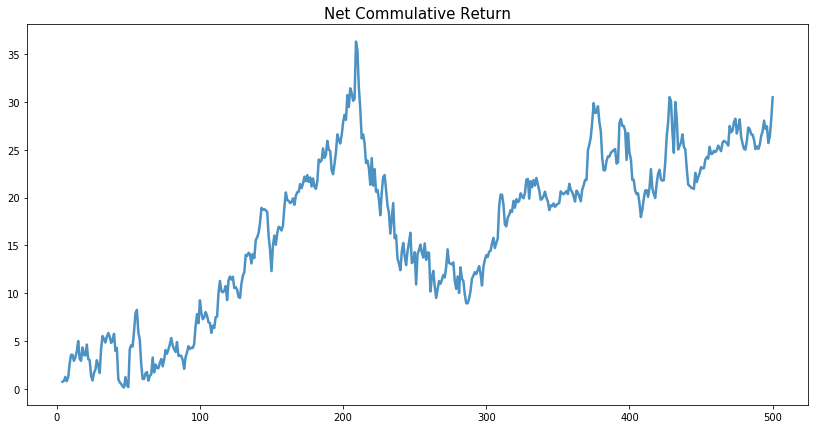

In [610]:
#ploting net cummulative returns

plt.figure(figsize=(14,7))
ds['net_cum_returns'] = (((ds['Close Price'] - ds['Open Price'])/(ds['Open Price']))*100).cumsum()
plt.plot(ds['net_cum_returns'],linewidth=2.5,alpha =0.8)
plt.title('Net Commulative Return',fontsize=15)

# Thank You!